### Tutorial 4: Composite Wavefunctions

>> Charlie Duke  
Physics Department, Grinnell College   
October 2020  

Revision of notebook developed by:  
>> Emily Griffin '17 and Androniki Mitrou '17  
>> Grinnell College  
>> May 2015  

> This notebook illustrates composite wavefunctions created by summing stationary-state wavefunctions produced by the QuantumWell solver.  Specifically, it provides an animation over time of the composite wavefunction from the first two stationary states of a potential well with a single internal potential barrier.  

The potential well details and the stationary state wavefunctions were previously created using the potential-well solver with the results stored in a .dpw file. After adding the time dependent function, the animated plot occurs in an external window, possibly hidden behind this window. If so, move this window to find it.

*  Read stationary state wavefunctions produced by the quantum potential-well solver
*  Verify Normalization
*  Create composite wavefunctions and normalize
*  Calculate some expectation values
*  Add time dependence

We assume that you have already familiar with reading and on writing .dpw files as shown in their tutorials.  If not, you should work through these tutorials before using this notebook.

In [1]:
import sys,os

# setup plotting methods with inline graphs
#%pylab inline
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from numpy import *

%load_ext autoreload
%autoreload 2

In [2]:
# We have to add the path to the src folder to sys.path
# as in previous tutorials

from getPath import setPath
setPath(sys.path)

# check out sys.path if you want
# The first element should be the path to the src directory
if True:
    print(sys.path)

['/Users/charlesduke/Github/QuantumWell/src', '/Users/charlesduke/Github/QuantumWell/Tutorials', '/Users/charlesduke/Github/root/lib', '/Users/charlesduke/opt/anaconda3/lib/python38.zip', '/Users/charlesduke/opt/anaconda3/lib/python3.8', '/Users/charlesduke/opt/anaconda3/lib/python3.8/lib-dynload', '', '/Users/charlesduke/opt/anaconda3/lib/python3.8/site-packages', '/Users/charlesduke/opt/anaconda3/lib/python3.8/site-packages/aeosa']


In [3]:
# with path set, can import from src directory
from DataPotentialWell import *

In [4]:
# create class instances and read the existing .dpw files which should be in 
#   this directory
dpwfile1 = "psi1.dpw"
dpwfile2 = "psi2.dpw"
dpw1 = DataPotentialWell()
dpw1.readDpwFile(dpwfile1)

dpw2 = DataPotentialWell()
dpw2.readDpwFile(dpwfile2)

# set to True to print the well data for dpw1 or dpw2, 
if False:
    print('dpw1 data  ')
    dpw1.printData()
    print('\n')
    print('dpw2 data')
    dpw2.printData()
    print('\n')

In [5]:
# get the x, psi, and psiPrime arrays from the data class instances
#   psiPrime is the first-derivative of psi
x = dpw1.getXArray()
print("x.shape ",x.shape)
ind = 10

# get the distance between x bin edges
delX = dpw1.getXBinWidth()
print("delX ",delX," nm")

# get the psi arrays, they should already be normalized
psi1N = dpw1.getPsiArrayNormalized()
psi2N = dpw2.getPsiArrayNormalized()

# get the potential array
vArray = dpw1.getVArray()

# here are the stationary state energies for the two states
#   the energies associated with the psi wavefunction
e1 = dpw1.getPsiEnergy()
e2 = dpw2.getPsiEnergy()
print("energy for state1 and state2 ",e1,e2,)

x.shape  (500,)
delX  0.0008016032064128256  nm
energy for state1 and state2  6.935564600702201 9.626514993545921


In [6]:
# check normalization
n1 = sum(psi1N*psi1N)*delX
n2 = sum(psi2N*psi2N)*delX
print('check normalization')
print("sum(psi*psi)*delX for psi1N ",n1)
print("sum(psi*psi)*delX for psi2N ",n2)

check normalization
sum(psi*psi)*delX for psi1N  1.0
sum(psi*psi)*delX for psi2N  0.9999999999999998


In [43]:
# set False to True to make plots of the stationary-state wavefunctions
# have a look at psi1N and psi2N (psi1N is red, internal barrier is green)

if True:
    plt.plot(x,psi1N,'r')
    plt.plot(x,psi2N,'b')
    zoom = 0.15
    plt.plot(x,vArray*zoom,'g')
    maxV = vArray.max()*zoom
    plt.plot([dpw1.xmin,dpw1.xmin],[0.0,maxV],'g')
    plt.plot([dpw1.xmax,dpw1.xmax],[0.0,maxV],'g')
    plt.grid()

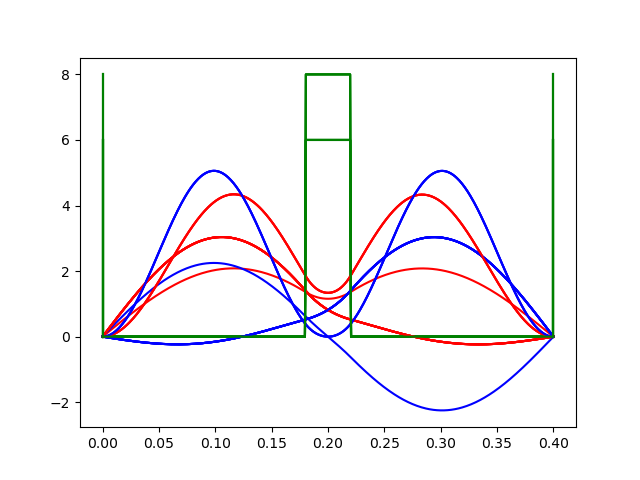

In [21]:
# Ditto to have a look at the probability distributions
if True:
    plt.figure(1)
    plt.plot(x,psi1N*psi1N,'r')
    plt.plot(x,psi2N*psi2N,'b')
    zoom = 0.2
    plt.plot(x,vArray*zoom,'g')
    maxV = vArray.max()*zoom
    plt.plot([dpw1.xmin,dpw1.xmin],[0.0,maxV],'g')
    plt.plot([dpw1.xmax,dpw1.xmax],[0.0,maxV],'g')
    plt.grid()
    plt.show()


In [10]:
# are psi1N and psi2N orthogonal
print("sum(psi1N*psi2N)*delX ",sum(psi1N*psi2N)*delX)

sum(psi1N*psi2N)*delX  0.0006926071666805843


In [23]:
# make two composite wavefunctions from the sum and difference
# of psi1 and psi2

# psiSum and psiDiff should be normalized because of the 1/sqrt(2)
psiSum = (1/sqrt(2.))*(psi1N + psi2N)
psiDiff = (1/sqrt(2.0))*(psi1N - psi2N)

# verify normalization
print ("psiSum normalized ",sum(psiSum*psiSum)*delX )
print("psiDiff normalized ",sum(psiDiff*psiDiff)*delX )

psiSum normalized  1.0006926071666802
psiDiff normalized  0.999307392833319


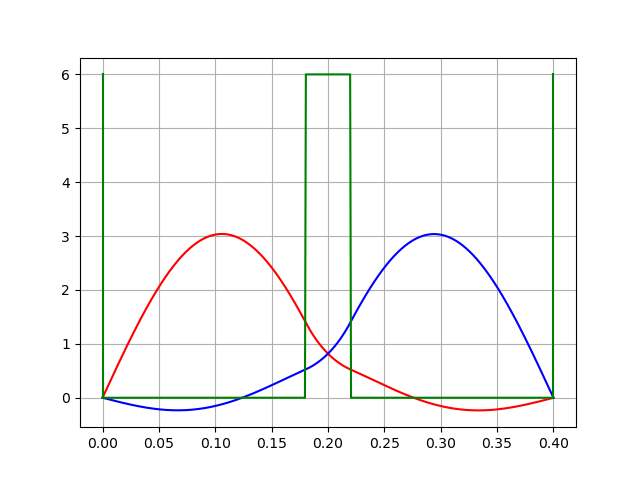

In [24]:
# have a look at psiSum and psiDiff, psiSum is red
# internal barrier in green

if True:
    plt.close('all')
    plt.figure(4)
    plt.plot(x,psiSum,'r')
    plt.plot(x,psiDiff,'b')
    zoom = 0.15
    plt.plot(x,vArray*zoom,'g')
    maxV = vArray.max()*zoom
    plt.plot([dpw1.xmin,dpw1.xmin],[0.0,maxV],'g')
    plt.plot([dpw1.xmax,dpw1.xmax],[0.0,maxV],'g')
     
    plt.grid()
    plt.show()


In [14]:
# are psiSum and psiDiff orthogonal
print( sum(  psiSum*psiDiff)*delX  )

7.404453358622286e-17


In [25]:
# have a look at the expectation value of x
print( "<x> for psiSum",sum( psiSum*x*psiSum)* delX )
print( "<x> for psiDiff",sum( psiDiff*x*psiDiff)*delX)

<x> for psiSum 0.10862045331280205
<x> for psiDiff 0.29125186928579855


#### Add time dependence to the wave function
> You started with the time dependent Schrodinger equation and separated the space and time variables to create the time-independent Schrodinger equation.  The QuantumWell solver solves this equation, including finding the stationary-state energies where the wavefunctions have physically realistic boundary conditions.

* Have a look at the differential equation for the time dependence of the stationary-state wavefunction and you'll see it has the form (python uses the letter $j$ rather than $i$ to indicate an imaginary number)

 $$\phi(t)=A exp(-j\frac E \hbar t) $$
 
* Thus, the complete wavefunction for a stationary state is $\psi (x) * \phi (t) $ 
* But, the properties of a particle in a stationary state are independent of time.  Try calculating the expectation value of x using the full wavefunction and you'll see the exponential time terms disappear.
* This gets more interesting for example, if we start the electron in the left subwell at $t = 0$ by assuming that the wavefunction at $t=0$ is $psiSum$ from the last section.  The probability distribution for psiSum peaks in the left subwell - that's what we want.

* To be more precise, the relative phase angle between the two components of psiSum is zero at $t=0$ and increases as $t$ progresses. Just work it out; rederive psiSum by including each exponential time term and then calculate the probability density.  You'll find that the relative phase angle is all that matters (don't forget that the wavefunction is now a complex function)

 
 

In [26]:
# a look at python complex data class
# example: ac = 1 + 2j and ab = 5 + 3j
ac = 1 + 2j

print("type(ac) ",type(ac)," ",ac," ",real(ac)," ",imag(ac))
print("exp(ac) ", exp(ac))

ab = 5 + 3j
print(ac,ab,ac+ab,ac*ab,ac/ab)

type(ac)  <class 'complex'>   (1+2j)   1.0   2.0
exp(ac)  (-1.1312043837568135+2.4717266720048188j)
(1+2j) (5+3j) (6+5j) (-1+13j) (0.3235294117647059+0.20588235294117646j)


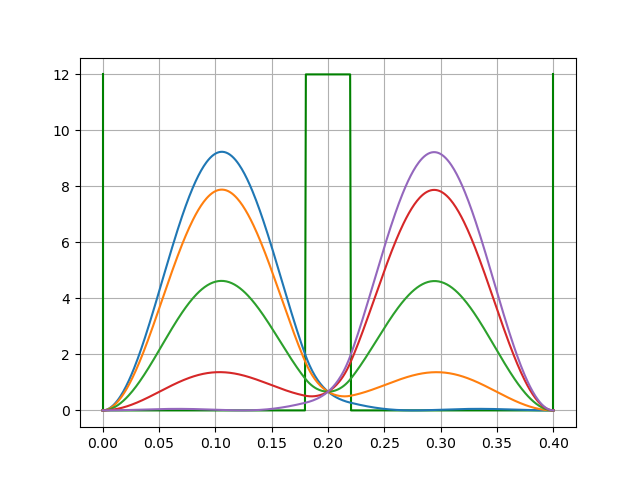

In [42]:
# Let's plot some probability densities for your choice of relative phases
# make a list of phase angles and make some plots, note the relative 
# angle in the definition of psi.  You could just as well include the 
# exponential time term in psi1N and in psi2N. In my case, I used the 
# relative phase since I can make the period 1 sec,e.g. 
# ((E2 - E1)/hbar)* 1sec = 2*pi.

# pick a phase angle list or create one of your own and rerun the cell
# to produce a plot for each phase angle in your phaseDegL list.
phaseDegL = [0.0]
phaseDegL = [180.0]
phaseDegL = [0.0,180.0]
phaseDegL = [0.0,270.0]
phaseDegL = [0.0,45.0,90.0,135.0,180.0]

zoom = 0.3
plt.close('all')
plt.figure(6)

plt.plot(x,vArray*zoom,'g')
maxV = vArray.max()*zoom
plt.plot([dpw1.xmin,dpw1.xmin],[0.0,maxV],'g')
plt.plot([dpw1.xmax,dpw1.xmax],[0.0,maxV],'g')
#plt.show()

# make a plot of probability density for each phase angle
#plt.figure(7)
for angle in deg2rad(phaseDegL):
    psi = (1/sqrt(2.0))*(psi1N + psi2N*exp(angle*1j))
    probDen = real(np.conj(psi) * psi)
    plt.plot(x,probDen)
    plt.grid()
plt.show()

 These plots cry out for an animation; see the tutorial5_animation.ipynb for details
